# Deep feed-forward networks
## a.k.a. multi-layer percpetrons
#### Gunnar Blohm

### Outline

- motivation and general structure
- transfer functions
- cost function and maximum likelihood estimation (MLE)
- gradient learning: error backpropagation

### Motivation and general structure

**Goal**: approximate $\vec{y} = f^*(\vec{x})$

**Approach**: learn $\vec{\theta}$ for $\vec{y} = f(\vec{x},\vec{\theta})$ so that $f \longrightarrow f^*$

### Motivation and general structure

![MLP image](stuff/MLP.png)

### Transfer functions

a.k.a. activation functions (can also contain bias terms...) 

![transfer function](stuff/transfer-function.jpg)

### Transfer functions

Transfer functions can have many different shapes...

![different transfer functions](stuff/transfer-functions.png)

### Cost functions and MLE

Most modern networks are trained using MLE. I.e. the cost function is the negative log-likelihood = cross-entropy between training data and model distribution!

$$J(\theta)=-\mathbb{E}_{x,y \sim \hat{p}_{data}} \log p_{model}(y|x)$$

if $p_{model}(y|x)=\mathcal{N}(y; f(x;\theta), I)$, then we get the mean squared error cost function:

$$ J(\theta)=\frac{1}{2}\mathbb{E}_{x,y \sim \hat{p}_{data}} \Vert y - f(x; \theta) \Vert^2 + const$$

### Cost functions and MLE

Ultimately, we want to minimize this cost to approximate $f$ with $f^*$

$$ f^* = \underset{f}{\arg\min} \mathbb{E}_{x,y \sim \hat{p}_{data}} \Vert y - f(x; \theta) \Vert^2$$

To do so, we will use gradient descent!

### Gradient learning

<img src="stuff/node.png" alt="1-layer" width="200" align="right"/>

We want to learn the weights $w_{ij}$ so that $w_{ij} \longleftarrow w_{ij}+\Delta w_{ij}$. We will use gradient descent just like previously...

$$\Delta w_{ij} = -\epsilon \frac{dJ}{dw_{ij}}$$

### Gradient learning

<img src="stuff/chain.png" alt="chain" width="50" align="right"/>

To compute $\frac{dJ}{dw_{ij}}$, we will use the chain rule.

Reminder: 

$$\frac{dz}{dw} = \frac{dz}{dy} \frac{dy}{dx} \frac{dx}{dw}$$

### Gradient learning

<img src="stuff/node.png" alt="1-layer" width="200" align="right"/>

Thus, for a 2-layer network we get (whiteboard...):

$$\Delta w_{ij}=-\epsilon \cdot g'(h_i) \cdot (r_i^{out} - y_i) \cdot r_j^{in}$$

with $h_i = \sum_{j} w_{ij} r_j^{in}$

### Gradient learning

For multi-layer networks, the procedure is the same, but now you have longer derivatives chains...

3-layer network: $\frac{\partial J}{\partial w_{ij}^{out}} = \delta_i^{out} \cdot r_j^h$

with $ \delta_i^{out} = g'^{out}(h_i^h) \cdot (r_i^{out} - y_i) $

Now for $w_{ij}^h$, we get:

$$\frac{\partial J}{\partial w_{ij}^{h}} = \frac{1}{2} \frac{1}{\partial w_{ij}^{h}} \sum_{i} \left (g^{out} \left (\sum_{j} w_{ij}^{out} g^h \left (\sum_{k} w_{jk}^h r_k^{in} \right ) \right ) - y_i \right )^2$$

$$ = \delta_i^h \cdot r_j^{in}$$

with $ \delta_i^h = g'(h_i^{in}) \sum_{k} w_{ik}^{out} \delta_k^{out} $. **This is back-propagation of error $\delta$!**

### Backprop

<img src="stuff/Mazzoni.png" alt="Mazzoni" width="400" align="right"/>

Now let's try to implement this by reproducing [Zipser & Andersen (1988). A back-propagation programmed network that simulates response properties of a subset of posterior parietal neurons](https://www.nature.com/articles/331679a0).



**Network task (training set)**: Add 2 variables coded in distributed neural population codes

(Figure from Mazzoni, Andersen & Jordan, 1991)

### Backprop

Setup...

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# create training set
N = 200 # length of training set

# wite your training set


### Backprop

Network definition and initialization

In [135]:
# create network
x = np.linspace(-50,50,101) # preferred directions of input units
Ni = 2+len(x)
Nh = 21 # number hidden layer units
No = len(x) # number population output units
eps = 0.1 # learning rate

In [136]:
# initialize weights

# random initialization

### Backprob

We still need to define our network node transfer function (sigmoid):

$$ y = \frac{1}{1+e^{-x}} $$

In [28]:
def NTF(x):
    '''network node transfer function''' 
    #define
    return y

And we need to define the input activations (Gaussian population code)

In [59]:
def PPC(x, inp):
    '''Gaussian input population code''' 
    #define
    return y

### Backprop

Now we can go into the learning loop...

In [137]:
# for housekeeping
il = np.zeros((Ni,N))
hl = np.zeros((Nh, N))
ol = np.zeros((No, N))
out = np.zeros(N)
err = np.zeros(N)
de3 = np.zeros(N)
dw3 = np.zeros((No,N))
de2 = np.zeros((No,N))
dw2 = np.zeros((No,Nh,N))
de1 = np.zeros((Nh,N))
dw1 = np.zeros((Nh,Ni,N))
ERR = []

In [142]:
for j in range(100): # training iterations
    for i in range(len(input[0,:])): # loop over training set
        # encode input
        
        # compute layer activations
        
        
        # decode output (read-out)
        
        # back-propagation (gradient descent)
        
    # update weights
     
    # record error changes
    

Text(0, 0.5, 'MSE')

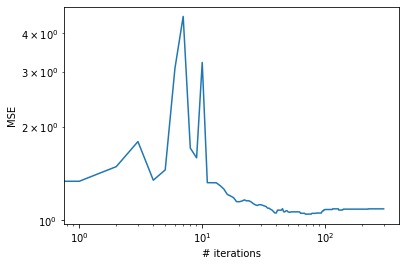

In [143]:
# plot learing curve
n = len(ERR)
xx = np.linspace(0, n, n)
plt.loglog(xx,ERR)
plt.xlabel('# iterations')
plt.ylabel('MSE')